# 3-dimensional tight-binding model for SnTe with tetragonal unit cell

The basis chosen is: 

$$|\Psi\rangle = \left\{
|\psi_{p_x,\uparrow}^\text{Sn,1} \rangle,
|\psi_{p_x,\downarrow}^\text{Sn,1} \rangle,
|\psi_{p_y,\uparrow}^\text{Sn,1} \rangle,
|\psi_{p_y,\downarrow}^\text{Sn,1} \rangle,
|\psi_{p_z,\uparrow}^\text{Sn,1} \rangle,
|\psi_{p_z,\downarrow}^\text{Sn,1} \rangle,
|\psi_{p_x,\uparrow}^\text{Sn,2} \rangle,
|\psi_{p_x,\downarrow}^\text{Sn,2} \rangle,
|\psi_{p_y,\uparrow}^\text{Sn,2} \rangle,
|\psi_{p_y,\downarrow}^\text{Sn,2} \rangle,
|\psi_{p_z,\uparrow}^\text{Sn,2} \rangle,
|\psi_{p_z,\downarrow}^\text{Sn,2} \rangle, \\
|\psi_{p_x,\uparrow}^\text{Te,1} \rangle,
|\psi_{p_x,\downarrow}^\text{Te,1} \rangle,
|\psi_{p_y,\uparrow}^\text{Te,1} \rangle,
|\psi_{p_y,\downarrow}^\text{Te,1} \rangle,
|\psi_{p_z,\uparrow}^\text{Te,1} \rangle,
|\psi_{p_z,\downarrow}^\text{Te,1} \rangle,
|\psi_{p_x,\uparrow}^\text{Te,2} \rangle,
|\psi_{p_x,\downarrow}^\text{Te,2} \rangle,
|\psi_{p_y,\uparrow}^\text{Te,2} \rangle,
|\psi_{p_y,\downarrow}^\text{Te,2} \rangle,
|\psi_{p_z,\uparrow}^\text{Te,2} \rangle,
|\psi_{p_z,\downarrow}^\text{Te,2} \rangle
\right\}$$.

In [1]:
import numpy as np
import qsymm
import math
from scipy.linalg import block_diag
from numpy import linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from PIL import Image
%matplotlib inline

## Hamiltonian

In [16]:
zero6 = np.zeros((6,6))
zero3 = np.zeros((3,3))

# Pauli matrices and the like
sigma_x = np.array([[0, 1],[1, 0]])
sigma_y = np.array([[0, -1j],[1j, 0]])
sigma_z = np.array([[1, 0],[0, -1]])
zeros = np.zeros((2,2))

# Spin-orbit interaction matrix
soc_1 = np.hstack((zeros,sigma_z,-sigma_y))
soc_2 = np.hstack((-sigma_z, zeros, sigma_x))
soc_3 = np.hstack((sigma_y, -sigma_x, zeros))
soc = np.vstack((soc_1, soc_2, soc_3))

# Hamiltonian
def ham(kx, ky, kz, m, tSn, tTe, t, a, lambdaSn, lambdaTe):
    Hos = -m*np.kron(sigma_z, np.eye(6))
    Hamnn = 2*t*np.array([
        [math.cos(kx*a/2), 0, 0, 0, 0, 0],
        [0, 0, 0, 0, math.cos(ky*a/2), 0],
        [0, 0, math.cos(kz*a/2), 0, 0, 0],
        [0, 0, 0, math.cos(kx*a/2), 0, 0],
        [0, math.cos(ky*a/2), 0, 0, 0, 0],
        [0, 0, 0, 0, 0, math.cos(kz*a/2)]
    ])
    Hnn = np.vstack((
        np.hstack((zero6, Hamnn)),
        np.hstack((Hamnn, zero6))))
    Hamxynnn = 2*np.array([
        [math.cos(kx*a/2)*math.cos(ky*a/2), -math.sin(kx*a/2)*math.sin(ky*a/2), 0],
        [-math.sin(kx*a/2)*math.sin(ky*a/2), math.cos(kx*a/2)*math.cos(ky*a/2), 0],
        [0, 0, 0]
    ])
    Hxynnn = np.vstack((    
    np.hstack((zero3, tSn*Hamxynnn, zero3, zero3)),
    np.hstack((tSn*Hamxynnn, zero3, zero3, zero3)),
    np.hstack((zero3, zero3, zero3, tTe*Hamxynnn)),
    np.hstack((zero3, zero3, tTe*Hamxynnn, zero3)),
    ))
    Hamyznnn = 2*np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, math.cos(ky*a/2)*math.cos(kz*a/2), -math.sin(ky*a/2)*math.sin(kz*a/2)],
        [0, 0, 0, 0, -math.sin(ky*a/2)*math.sin(kz*a/2), math.cos(ky*a/2)*math.cos(kz*a/2)],
        [0, 0, 0, 0, 0, 0],
        [0, math.cos(ky*a/2)*math.cos(kz*a/2), -math.sin(ky*a/2)*math.sin(kz*a/2), 0, 0, 0],
        [0, -math.sin(ky*a/2)*math.sin(kz*a/2), math.cos(ky*a/2)*math.cos(kz*a/2), 0, 0, 0]
    ])
    Hyznnn = np.vstack((
    np.hstack((tSn*Hamyznnn, zero6)),
    np.hstack((zero6, tTe*Hamyznnn))
    ))
    Hamxznnn = 2*np.array([
        [math.cos(kx*a/2)*math.cos(kz*a/2), 0, -math.sin(kx*a/2)*math.sin(kz*a/2)],
        [0, 0, 0],
        [-math.sin(kx*a/2)*math.sin(kz*a/2), 0, math.cos(kx*a/2)*math.cos(kz*a/2)]
    ])
    Hxznnn = np.vstack((
    np.hstack((tSn*Hamxznnn, zero3, zero3, zero3)),
    np.hstack((zero3, tSn*Hamxznnn, zero3, zero3)),
    np.hstack((zero3, zero3, tTe*Hamxznnn, zero3)),
    np.hstack((zero3, zero3, zero3, tTe*Hamxznnn))
    ))
    H = np.add(np.add(np.add(np.add(Hnn, Hxynnn), Hyznnn), Hxznnn), Hos)
    ham = np.kron(H, np.eye(2))
    ham_SOC = np.kron([[lambdaSn, 0, 0, 0], [0, lambdaSn, 0, 0],[0, 0, lambdaTe, 0],[0, 0, 0, lambdaTe]], soc)*-1j
    return np.add(ham, ham_SOC)
    #return H

#print(ham(0, 0, 0, 0, 0, 0, 0, 0, 1, 1))

matrixsize = len(ham(0,0,0,0,0,0,0,0,0,0)) # Size of the basis
#print(matrixsize)

## k-points high symmetry points
From Sessi (2016) we implement the following sequence of high symmetry points

$$
\Gamma - X - M - \Gamma - Z - R - A - Z
$$
which describes the points on a simple tetragonal lattice (TET). For simplicity, we assume that they are equally spaced.

In [7]:
stepsize = 200
hsp = 7 # Number of high symmetry points
a = 1

kx_ar = np.zeros(hsp*stepsize + 1)
for i in range(stepsize):
    kx_GX = i*2*np.sqrt(2)*np.pi/(stepsize)/a
    kx_XM = np.pi*2*np.sqrt(2)/a
    kx_MG = (stepsize - i)*2*np.sqrt(2)*np.pi/(stepsize)/a
    kx_GZ = 0
    kx_ZR = 2*np.sqrt(2)*i*np.pi/(stepsize)/a
    kx_RA = 2*np.sqrt(2)*np.pi/a
    kx_AZ = (stepsize - i)*2*np.sqrt(2)*np.pi/(stepsize)/a
    kx_ar[i] = kx_GX
    kx_ar[i + stepsize] = kx_XM
    kx_ar[i + 2*stepsize] = kx_MG
    kx_ar[i + 3*stepsize] = kx_GZ
    kx_ar[i + 4*stepsize] = kx_ZR
    kx_ar[i + 5*stepsize] = kx_RA
    kx_ar[i + 6*stepsize] = kx_AZ
    kx_ar[7*stepsize] = 0
    
ky_ar = np.zeros(hsp*stepsize + 1)
for i in range(stepsize):
    ky_GX = 0
    ky_XM = i*np.pi*2*np.sqrt(2)/a/stepsize
    ky_MG = (stepsize - i)*2*np.sqrt(2)*np.pi/(stepsize)/a
    ky_GZ = 0
    ky_ZR = 0
    ky_RA = i*np.pi*2*np.sqrt(2)/a/stepsize
    ky_AZ = (stepsize - i)*2*np.sqrt(2)*np.pi/(stepsize)/a
    ky_ar[i] = ky_GX
    ky_ar[i + stepsize] = ky_XM
    ky_ar[i + 2*stepsize] = ky_MG
    ky_ar[i + 3*stepsize] = ky_GZ
    ky_ar[i + 4*stepsize] = ky_ZR
    ky_ar[i + 5*stepsize] = ky_RA
    ky_ar[i + 6*stepsize] = ky_AZ
    ky_ar[7*stepsize] = 0
    
kz_ar = np.zeros(hsp*stepsize + 1)
for i in range(stepsize):
    kz_GX = 0
    kz_XM = 0
    kz_MG = 0
    kz_GZ = i*np.pi/(stepsize)/a
    kz_ZR = np.pi/a
    kz_RA = np.pi/a
    kz_AZ = np.pi/a
    kz_ar[i] = kz_GX
    kz_ar[i + stepsize] = kz_XM
    kz_ar[i + 2*stepsize] = kz_MG
    kz_ar[i + 3*stepsize] = kz_GZ
    kz_ar[i + 4*stepsize] = kz_ZR
    kz_ar[i + 5*stepsize] = kz_RA
    kz_ar[i + 6*stepsize] = kz_AZ
    kz_ar[7*stepsize] = np.pi/a
    
k_array = np.zeros(hsp*stepsize + 1)
for i in range(hsp*stepsize + 1):
    k_array[i] = i

kx_array = 1/(2*np.sqrt(2))*(kx_ar - ky_ar)
ky_array = kz_ar
kz_array = 1/(2*np.sqrt(2))*(kx_ar + ky_ar)

#plt.plot(k_array, kz_array)
#plt.plot(k_array, kz_ar)
plt.show()

## k-points high symmetry points (rescaled)
From Sessi (2016) we implement the following sequence of high symmetry points

$$
\Gamma - X - M - \Gamma - Z - R - A - Z
$$
which describes the points on a simple tetragonal lattice (TET). Now we scale the k-points with the distance between two high symmetry points

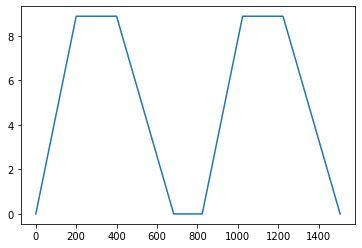

In [4]:
stepsize = 200
hsp = 7 # Number of high symmetry points
a = 1
hsp_rel = 4*1+2*np.sqrt(2)+1/np.sqrt(2)

################################################## kx

kx_ar = np.zeros(int(hsp_rel*stepsize) + 1)
for i in range(stepsize):
    kx_GX = i*2*np.sqrt(2)*np.pi/(stepsize)/a
    kx_XM = np.pi*2*np.sqrt(2)/a
    kx_ZR = 2*np.sqrt(2)*i*np.pi/(stepsize)/a
    kx_RA = 2*np.sqrt(2)*np.pi/a
    kx_ar[i] = kx_GX # is goed
    kx_ar[i + stepsize] = kx_XM # is goed
    kx_ar[i + int((2 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)] = kx_ZR
    kx_ar[i + int((3 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)] = kx_RA
    kx_ar[-1] = 0

for i in range(int(stepsize*np.sqrt(2))):
    kx_MG = (stepsize*np.sqrt(2) - i)*2*np.sqrt(2)*np.pi/(stepsize*np.sqrt(2))/a
    #print(kx_MG)
    kx_AZ = (stepsize*np.sqrt(2) - i)*2*np.sqrt(2)*np.pi/(stepsize*np.sqrt(2))/a
    kx_ar[i + 2*stepsize] = kx_MG # is goed
    kx_ar[i + int((4 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)] = kx_AZ

#################################################### ky   
    
ky_ar = np.zeros(int(hsp_rel*stepsize) + 1)
for i in range(stepsize):
    ky_GX = 0
    ky_XM = i*np.pi*2*np.sqrt(2)/a/stepsize
    ky_ZR = 0
    ky_RA = i*np.pi*2*np.sqrt(2)/a/stepsize
    ky_ar[i] = ky_GX
    ky_ar[i + stepsize] = ky_XM
    ky_ar[i + int((2 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)] = ky_ZR
    ky_ar[i + int((3 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)] = ky_RA
    ky_ar[-1] = 0

for i in range(int(stepsize*np.sqrt(2))):
    ky_MG = (stepsize*np.sqrt(2) - i)*2*np.sqrt(2)*np.pi/(stepsize*np.sqrt(2))/a
    ky_AZ = (stepsize*np.sqrt(2) - i)*2*np.sqrt(2)*np.pi/(stepsize*np.sqrt(2))/a
    ky_ar[i + 2*stepsize] = ky_MG
    ky_ar[i + int((4 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)] = ky_AZ

############################################### kz    

kz_ar = np.zeros(int(hsp_rel*stepsize) + 1)
for i in range(stepsize):
    kz_ZR = np.pi/a
    kz_RA = np.pi/a
    kz_ar[i + int((2 + np.sqrt(2) + 1/np.sqrt(2))*stepsize) - 1] = kz_ZR
    kz_ar[i + int((3 + np.sqrt(2) + 1/np.sqrt(2))*stepsize) - 1] = kz_RA
    kz_ar[-1] = np.pi/a
    kz_ar[-2] = np.pi/a
    kz_ar[-3] = np.pi/a

for i in range(int(stepsize*np.sqrt(2))):
    kz_AZ = np.pi/a
    kz_ar[i + int((4 + np.sqrt(2) + 1/np.sqrt(2))*stepsize) - 1] = kz_AZ
    
for i in range(int(stepsize/np.sqrt(2))):
    kz_GZ = i*np.pi/(stepsize/np.sqrt(2))/a
    kz_ar[i + int((2 + np.sqrt(2))*stepsize)] = kz_GZ

# The k-axis
k_array = np.zeros(int(hsp_rel*stepsize) + 1)
for i in range(int(hsp_rel*stepsize) + 1):
    k_array[i] = i
    
kx_array = 1/(2*np.sqrt(2))*(kx_ar - ky_ar)
ky_array = kz_ar
kz_array = 1/(2*np.sqrt(2))*(kx_ar + ky_ar)

plt.plot(k_array, kx_ar)
plt.show()

## Plot the dispersion

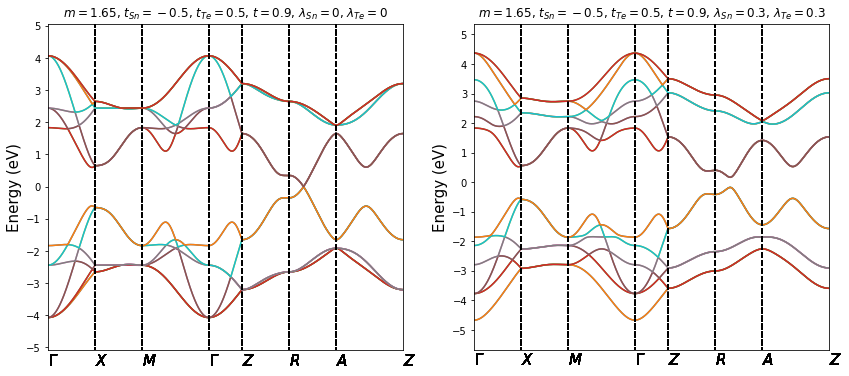

In [4]:
# Model parameters, first plot
m = 1.65
tSn = -0.5
tTe = 0.5
t = 0.9
a = 1
lambdaSn = 0
lambdaTe = 0

hsp = 7 # Number of high symmetry points

# Generate the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

############################################################################# Plot 1

# Generate the energy bands from diagonalizing the aforementioned Hamiltonion
energies = np.zeros((matrixsize, int(hsp_rel*stepsize + 1)))
for i in range(int(hsp_rel*stepsize + 1)):
    kx = kx_array[i]
    ky = ky_array[i]
    kz = kz_array[i]
    for j in range(matrixsize):
        energies[j][i] = LA.eigvalsh(ham(kx, ky, kz, m, tSn, tTe, t, a, lambdaSn, lambdaTe))[j]    

# The k-axis
k_array = np.zeros(int(hsp_rel*stepsize + 1))
for i in range(int(hsp_rel*stepsize + 1)):
    k_array[i] = i
        
# Dashed vertial lines for high symmetry points  
minimum = np.min(energies) 
maximum = np.max(energies)
_list = [minimum - 3, maximum + 3]
X = int(stepsize)
X_list = np.ones(2)*X
M = int(2*stepsize)
M_list = np.ones(2)*M
G = int((2 + np.sqrt(2))*stepsize)
G_list = np.ones(2)*G
Z = int((2 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)
Z_list = np.ones(2)*Z
R = int((3 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)
R_list = np.ones(2)*R
A = int((4 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)
A_list = np.ones(2)*A

for i in range(matrixsize):
    ax1.plot(k_array, energies[i])
    ax1.set_ylabel(r"Energy (eV)", fontsize = 15)
    ax1.set_xlim(0, max(k_array))
    ax1.set_ylim(np.min(energies) - 1,np.max(energies) + 1)
    ax1.set_xticks([])
    ax1.set_yticks(np.arange(-5, 5.5, 1))
    ax1.set_title(
        r'$m = %g$, $t_{Sn} = %g$, $t_{Te} = %g$, $t = %g$, $\lambda_{Sn} = %g$, $\lambda_{Te} = %g$' % (
            m, tSn, tTe, t, lambdaSn, lambdaTe), fontsize = 12)
    ax1.text(0, minimum - 1.5, '$\Gamma$', fontsize = 15)
    ax1.text(k_array[int(stepsize)], minimum - 1.5, '$X$', fontsize = 15)
    ax1.text(k_array[int(2*stepsize)], minimum - 1.5, '$M$', fontsize = 15)
    ax1.text(k_array[int((2 + np.sqrt(2))*stepsize)], minimum - 1.5, '$\Gamma$', fontsize = 15)
    ax1.text(k_array[int((2 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)], minimum - 1.5, '$Z$', fontsize = 15)
    ax1.text(k_array[int((3 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)], minimum - 1.5, '$R$', fontsize = 15)
    ax1.text(k_array[int((4 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)], minimum - 1.5, '$A$', fontsize = 15)
    ax1.text(k_array[len(k_array) - 1], minimum - 1.5, '$Z$', fontsize = 15)
    ax1.plot(X_list, _list, color = 'black', linestyle = 'dashed')
    ax1.plot(M_list, _list, color = 'black', linestyle = 'dashed')
    ax1.plot(G_list, _list, color = 'black', linestyle = 'dashed')
    ax1.plot(Z_list, _list, color = 'black', linestyle = 'dashed')
    ax1.plot(R_list, _list, color = 'black', linestyle = 'dashed')
    ax1.plot(A_list, _list, color = 'black', linestyle = 'dashed')

############################################################################ Plot 2

m = 1.65
tSn = -0.5
tTe = 0.5
t = 0.9
lambdaSn = 0.3
lambdaTe = 0.3

# Generate the energy bands from diagonalizing the aforementioned Hamiltonion
energies = np.zeros((matrixsize, int(hsp_rel*stepsize + 1)))
for i in range(int(hsp_rel*stepsize + 1)):
    kx = kx_array[i]
    ky = ky_array[i]
    kz = kz_array[i]
    for j in range(matrixsize):
        energies[j][i] = LA.eigvalsh(ham(kx, ky, kz, m, tSn, tTe, t, a, lambdaSn, lambdaTe))[j]    

# The k-axis
k_array = np.zeros(int(hsp_rel*stepsize + 1))
for i in range(int(hsp_rel*stepsize + 1)):
    k_array[i] = i
        
# Dashed vertial lines for high symmetry points  
minimum = np.min(energies) 
maximum = np.max(energies)

for i in range(matrixsize):
    ax2.plot(k_array, energies[i])
    ax2.set_ylabel(r"Energy (eV)", fontsize = 15)
    ax2.set_xlim(0, max(k_array))
    ax2.set_ylim(np.min(energies) - 1,np.max(energies) + 1)
    ax2.set_xticks([])
    ax2.set_yticks(np.arange(-5, 5.5, 1))
    ax2.set_title(
        r'$m = %g$, $t_{Sn} = %g$, $t_{Te} = %g$, $t = %g$, $\lambda_{Sn} = %g$, $\lambda_{Te} = %g$' % (
            m, tSn, tTe, t, lambdaSn, lambdaTe), fontsize = 12)
    ax2.text(0, minimum - 1.5, '$\Gamma$', fontsize = 15)
    ax2.text(k_array[int(stepsize)], minimum - 1.5, '$X$', fontsize = 15)
    ax2.text(k_array[int(2*stepsize)], minimum - 1.5, '$M$', fontsize = 15)
    ax2.text(k_array[int((2 + np.sqrt(2))*stepsize)], minimum - 1.5, '$\Gamma$', fontsize = 15)
    ax2.text(k_array[int((2 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)], minimum - 1.5, '$Z$', fontsize = 15)
    ax2.text(k_array[int((3 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)], minimum - 1.5, '$R$', fontsize = 15)
    ax2.text(k_array[int((4 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)], minimum - 1.5, '$A$', fontsize = 15)
    ax2.text(k_array[len(k_array) - 1], minimum - 1.5, '$Z$', fontsize = 15)
    ax2.plot(X_list, _list, color = 'black', linestyle = 'dashed')
    ax2.plot(M_list, _list, color = 'black', linestyle = 'dashed')
    ax2.plot(G_list, _list, color = 'black', linestyle = 'dashed')
    ax2.plot(Z_list, _list, color = 'black', linestyle = 'dashed')
    ax2.plot(R_list, _list, color = 'black', linestyle = 'dashed')
    ax2.plot(A_list, _list, color = 'black', linestyle = 'dashed')

## Reproduce Sessi (2016)

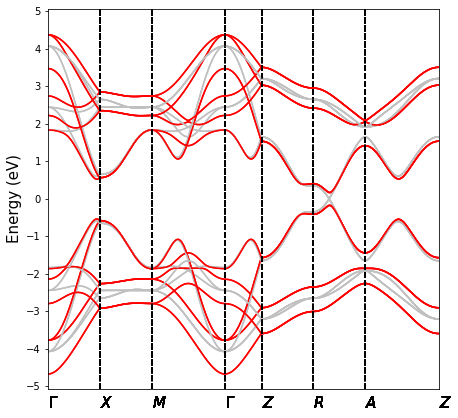

In [27]:
# Model parameters, first plot
m = 1.65
tSn = -0.5
tTe = 0.5
t = 0.9
a = 1
lambdaSn = 0.0
lambdaTe = 0.0

hsp = 7 # Number of high symmetry points

# Generate the plot
fig = plt.figure(figsize = (7,7))

# Generate the energy bands from diagonalizing the aforementioned Hamiltonion w/o SOC
energies_noSOC = np.zeros((matrixsize, int(hsp_rel*stepsize + 1)))
for i in range(int(hsp_rel*stepsize + 1)):
    kx = kx_array[i]
    ky = ky_array[i]
    kz = kz_array[i]
    for j in range(matrixsize):
        energies_noSOC[j][i] = LA.eigvalsh(ham(kx, ky, kz, m, tSn, tTe, t, a, lambdaSn, lambdaTe))[j]    

lambdaSn = 0.3
lambdaTe = 0.3
        
# Generate the energy bands from diagonalizing the aforementioned Hamiltonion w SOC
energies_SOC = np.zeros((matrixsize, int(hsp_rel*stepsize + 1)))
for i in range(int(hsp_rel*stepsize + 1)):
    kx = kx_array[i]
    ky = ky_array[i]
    kz = kz_array[i]
    for j in range(matrixsize):
        energies_SOC[j][i] = LA.eigvalsh(ham(kx, ky, kz, m, tSn, tTe, t, a, lambdaSn, lambdaTe))[j]         

# The k-axis
k_array = np.zeros(int(hsp_rel*stepsize + 1))
for i in range(int(hsp_rel*stepsize + 1)):
    k_array[i] = i
        
# Dashed vertial lines for high symmetry points  
minimum = np.min(energies_noSOC) 
maximum = np.max(energies_noSOC)
_list = [minimum - 1, maximum + 1]
X = int(stepsize)
X_list = np.ones(2)*X
M = int(2*stepsize)
M_list = np.ones(2)*M
G = int((2 + np.sqrt(2))*stepsize)
G_list = np.ones(2)*G
Z = int((2 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)
Z_list = np.ones(2)*Z
R = int((3 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)
R_list = np.ones(2)*R
A = int((4 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)
A_list = np.ones(2)*A

for i in range(matrixsize):
    plt.plot(k_array, energies_noSOC[i], 'silver')
    plt.plot(k_array, energies_SOC[i], 'red')
    plt.ylabel(r"Energy (eV)", fontsize = 15)
    plt.xlim(0, max(k_array))
    plt.ylim(np.min(energies_noSOC) - 1,np.max(energies_noSOC) + 1)
    plt.xticks([])
    plt.yticks(np.arange(-5, 5.5, 1))   
    #plt.title(
    #    r'$m = %g$, $t_{Sn} = %g$, $t_{Te} = %g$, $t = %g$, $\lambda_{Sn} = %g$, $\lambda_{Te} = %g$' % (
    #        m, tSn, tTe, t, lambdaSn, lambdaTe), fontsize = 12)
    plt.text(0, minimum - 1.5, '$\Gamma$', fontsize = 15)
    plt.text(k_array[int(stepsize)], minimum - 1.5, '$X$', fontsize = 15)
    plt.text(k_array[int(2*stepsize)], minimum - 1.5, '$M$', fontsize = 15)
    plt.text(k_array[int((2 + np.sqrt(2))*stepsize)], minimum - 1.5, '$\Gamma$', fontsize = 15)
    plt.text(k_array[int((2 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)], minimum - 1.5, '$Z$', fontsize = 15)
    plt.text(k_array[int((3 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)], minimum - 1.5, '$R$', fontsize = 15)
    plt.text(k_array[int((4 + np.sqrt(2) + 1/np.sqrt(2))*stepsize)], minimum - 1.5, '$A$', fontsize = 15)
    plt.text(k_array[len(k_array) - 1], minimum - 1.5, '$Z$', fontsize = 15)
    plt.plot(X_list, _list, color = 'black', linestyle = 'dashed')
    plt.plot(M_list, _list, color = 'black', linestyle = 'dashed')
    plt.plot(G_list, _list, color = 'black', linestyle = 'dashed')
    plt.plot(Z_list, _list, color = 'black', linestyle = 'dashed')
    plt.plot(R_list, _list, color = 'black', linestyle = 'dashed')
    plt.plot(A_list, _list, color = 'black', linestyle = 'dashed')
#fig.savefig('C:/Users/pimke/Documents/TUe/2020-2021/Master Thesis/Thesis/Figures/Python/Dispersion_SnTe_Sessi.png')